In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath


# additional configuration (optional)
%config InlineBackend.figure_format = 'retina'

from dask.distributed import Client #client is the interface to
from dask.distributed import LocalCluster #Start the cluster locally
cluster = LocalCluster()
client = Client(cluster) #Connect the client to the c
client

/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxesmf/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34056 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:37732 Dashboard: http://127.0.0.1:34056/status,Cluster Workers: 4 Cores: 8 Memory: 33.22 GB


In [90]:
ds_static_esm4 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_monthly.static.nc')

ds_static_cm4 = xr.open_dataset('/net/rlb/subtropical_gyres/mode_water/ocean_monthly.static.nc')

ds_runoff_control_esm4 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual.0101-0300.friver.nc',
                    chunks={'time':5},drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(time=slice('0121-07-02','0220-07-02'))

ds_runoff_control_cm4 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual.0196-0400.friver.nc',
                    chunks={'time':5},drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(time=slice('0281-07-02','0380-07-02'))

### meltwater perturbation:
ds_meltwater_cm4 = xr.open_dataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/ocean_monthly.009601-010012.prcme_adj.nc')
ds_meltwater_esm4 = xr.open_dataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly/ts/monthly/5yr/ocean_monthly.017101-017512.prcme_adj.nc')


/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxesmf/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [148]:
# Convert kg m-2 s-1 to Sv
runoff_esm4 = ds_runoff_control_esm4.friver.mean(dim='time')*(ds_static_esm4.areacello)*(1/1000)*(1/10**6)
runoff_esm4_nonzero = runoff_esm4.where(runoff_esm4 > 0)

meltwater_sv_esm4 = ds_meltwater_esm4.prcme_adj.mean(dim='time')*(ds_static_esm4.areacello)*(1/1000)*(1/10**6)
meltwater_sv_esm4_nonzero = meltwater_sv_esm4.where(meltwater_sv_esm4>0)

runoff_cm4 = ds_runoff_control_cm4.friver.mean(dim='time')*(ds_static_cm4.areacello)*(1/1000)*(1/10**6)
runoff_cm4_nonzero = runoff_cm4.where(runoff_cm4 > 0)

meltwater_sv_cm4 = ds_meltwater_cm4.prcme_adj.mean(dim='time')*(ds_static_cm4.areacello)*(1/1000)*(1/1e6)
meltwater_sv_cm4_nonzero = meltwater_sv_cm4.where(meltwater_sv_cm4>0)

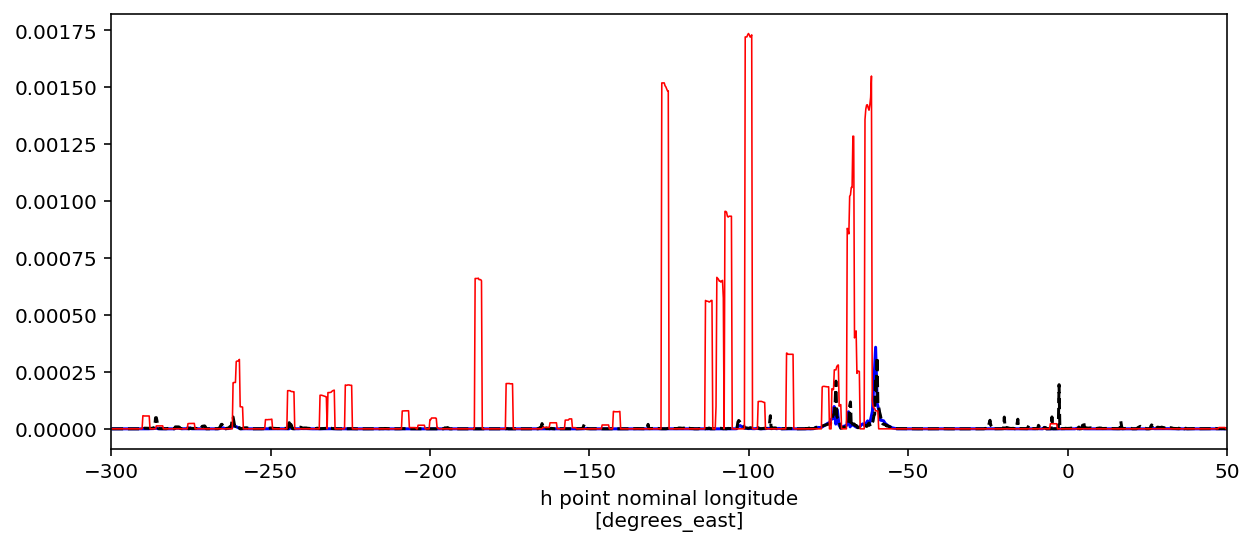

In [350]:
## Plot of freshwater flux in Sv by latitude
fig, ax = plt.subplots(figsize=[10,4])

runoff_esm4_nonzero.sel(yh=slice(-80,-60)).sum(dim='yh').plot(color='blue')
runoff_cm4_nonzero.sel(yh=slice(-80,-60)).sum(dim='yh').plot(color='black',linestyle='--')
meltwater_sv_cm4_nonzero.sel(yh=slice(-80,-60)).sum(dim='yh').plot(color='red',linewidth=0.80)

plt.xlim(-300,50)

plt.savefig('Antwater_fwf_perturbation_and_piControl_baseline_runoff_Sv.pdf')

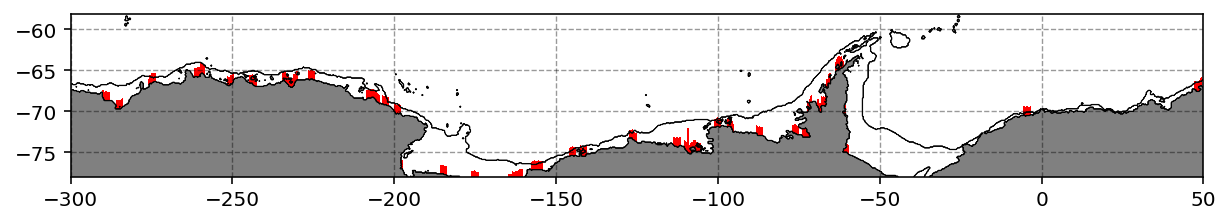

In [349]:
plt.figure(figsize=[10.15,1.5])

p = meltwater_sv_cm4_nonzero.sel(yh=slice(-78,-58)).plot.contourf(add_colorbar=False,
                                       add_labels=False,
                                       #subplot_kws={'facecolor':'gray'},
                                       colors='red')
plt.grid(color='black', alpha=0.4, linestyle='--',linewidth=0.7)
plt.xlim(-300,50)

shelf = ds_static_cm4.deptho.where(ds_static_cm4.deptho<1000)*0
shelf_mask = shelf.isin(0)

shelf_mask.sel(yh=slice(-78,-58)).plot.contour(colors='k',linewidths=0.30,add_labels=False)
ds_static_cm4.wet.where(ds_static_cm4.wet != 1).sel(yh=slice(-78,-58)).plot.contourf(colors='Grey',add_labels=False,add_colorbar=False)

plt.savefig('Antwater_fwf_perturbation_map.pdf)